# Mini Projeto de Sistemas Inteligentes
## K-Means - Dataset sobre as faculdades americanas
### Grupo:
- FNAP - Felipe Nunes de Almeida Pereira
- GME - Gabriel de Melo Evangelista
- JPSPM - João Pedro de Souza Pereira Moura
- MLLL - Maria Luísa Leandro de Lima
- WISS - Washington Igor Santos Silva

https://www.kaggle.com/flyingwombat/us-news-and-world-reports-college-data

## Imports

Neste trecho as bibliotecas necessárias para o código são importadas.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, silhouette_samples, silhouette_score, f1_score, accuracy_score, ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


## Leitura dos Dados

Faz-se a leitura de dados direto do Drive.

In [ ]:
collegeDf = pd.read_csv('/content/drive/MyDrive/College.csv')


In [ ]:
collegeDf.shape


(777, 19)

Observa-se que o dataset possui 777 observações com 19 colunas, em que uma delas, Private, é o atributo de classe.

In [ ]:
collegeDf.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### Visualização dos Dados

Faz-se a plotagem de gráficos com colunas duas a duas, Room.Board com Grad.Rate e Outstate com F.Undergrad, a fim de observar as separações das classes.

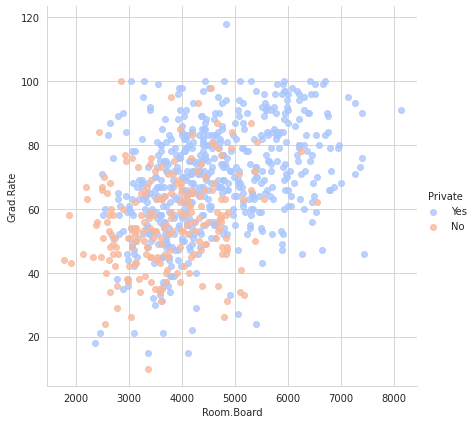

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x='Room.Board',y='Grad.Rate',data=collegeDf, hue='Private',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

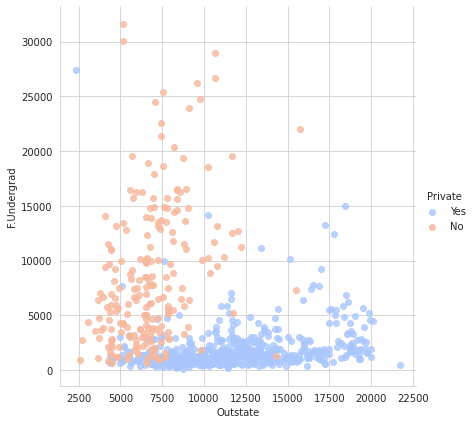

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x='Outstate',y='F.Undergrad',data=collegeDf, hue='Private',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

Aqui observa-se um histograma com separação de classes das colunas Outstate e Grad.Rate.

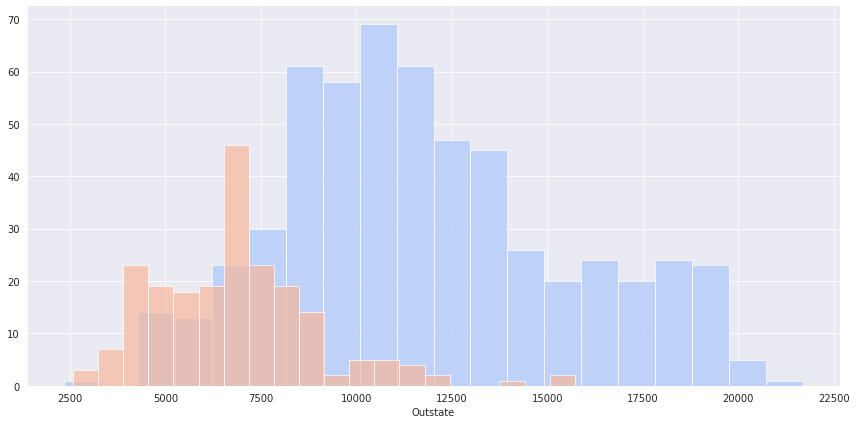

In [ ]:
sns.set_style('darkgrid')
g = sns.FacetGrid(collegeDf,hue="Private",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

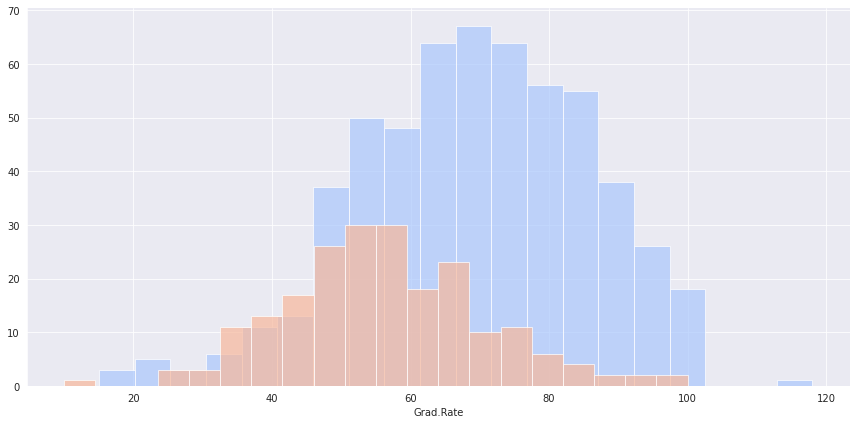

In [ ]:
sns.set_style('darkgrid')
g = sns.FacetGrid(collegeDf,hue="Private",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

Neste último gráfico é possível observar que há uma universidade com taxa de graduação maior que 100%.

### Tratamento dos Dados

In [ ]:
collegeDf[collegeDf['Grad.Rate'] > 100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


É feito então o ajuste deste valor para 100%.

In [ ]:
collegeDf['Grad.Rate'].loc[95] = 100

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
collegeDf[collegeDf['Grad.Rate'] > 100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


In [ ]:
collegeDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

Na tabela acima é possível observar que não há dados faltantes neste dataset, portanto não será necessário preencher os dados.

In [ ]:
collegeDf.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.440154
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.118804
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.000000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.000000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.000000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.000000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,100.000000


In [ ]:
collegeDf = collegeDf.drop(['Unnamed: 0'], axis = 1)

A coluna dos nomes das universidades não traz informações importantes para o treinamento de nosso modelo e por isso foi retirada.

In [ ]:
collegeDf['Private'].replace('Yes', 1, inplace = True)
collegeDf['Private'].replace('No', 0, inplace = True)

No código acima é feita a categorização da coluna Private.

In [ ]:
collegeDf.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
x = collegeDf.drop(['Private'], axis = 1)
y = collegeDf['Private']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 15)


É feita a separação dos dados em features, X, e saída, Y. Além disso, separa-se em treino e teste.

## Implementação do KMeans

A função abaixo é responsável por fazer a predição com o modelo e mostrar os seus resultados e sua matriz de confusão.

In [ ]:
def kmeans_pred(kmeans, x_test, y_test, train=True):
  predicted = kmeans.predict(x_test)
  if not train:
    print(classification_report(y_test, predicted))
    cm = confusion_matrix(y_test,predicted)
    cmd = ConfusionMatrixDisplay(cm, display_labels=y_test.unique())
    cmd.plot()
    plt.show()
  return predicted

### Plotando os valores do fit

In [ ]:
import matplotlib.cm as cm

Esta função cria o gráfico com a silhueta de cada cluster com o valor médio das silhuetas e com a visualização da predição para o treino num gráfico com as colunas Room.Board e Grad.Rate.

In [ ]:
def plot_fit(kmeans, x_train, n_clusters):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(x_train) + (n_clusters + 1) * 10])

  cluster_labels = kmeans.predict(x_train)
  ssValues = silhouette_samples(x_train, cluster_labels)
  sAvg = silhouette_score(x_train, cluster_labels)
  y_lower = 10
  for i in range(n_clusters):
    icValues = ssValues[cluster_labels == i]
    icValues.sort()
    size = icValues.shape[0]
    y_upper = y_lower + size

    color = cm.nipy_spectral(float(i)/n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0,
                      icValues,
                      facecolor=color,
                      edgecolor=color,
                      alpha=0.7,
                      ) 
    ax1.text(-0.05, y_lower + 0.5 * size, str(i))
    y_lower = y_upper + 10

  ax1.set_title("Silhueta para vários clusters")
  ax1.set_xlabel("Coeficiente da silhueta")
  ax1.set_ylabel("Label do Cluster")

  ax1.axvline(x=sAvg, color = 'red', linestyle='--')
  ax1.set_yticks([])
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  colors = cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)

  ax2.scatter(
      x_train['Room.Board'], x_train['Grad.Rate'], s=200, marker='.', alpha=0.7, c=colors, edgecolor='k'
  )

  ax2.set_title("Visualização dos dados")
  ax2.set_xlabel("Room.Board")
  ax2.set_ylabel("Grad.Rate")

  plt.suptitle(
      "Análise de silhueta do KMeans com n_clusters = %d"
      % n_clusters,
      fontsize=14,
      fontweight="bold",
  )

  plt.show()

### Plotando os valores da predição

A função abaixo cria um gráfico com a predição do modelo no teste.






In [ ]:
def plot_pred(predicted, x_test):
  df_clusters_test = pd.DataFrame()
  df_clusters_test.loc[:,"cluster"] = pd.Series(predicted)
  df_clusters_test = pd.concat([df_clusters_test,x_test],axis=1)

  sns.set_style('whitegrid')
  sns.lmplot(x='Room.Board',y='Grad.Rate',data=df_clusters_test,hue="cluster",
            palette='coolwarm',height=6,aspect=1,fit_reg=False)
  plt.show()

### Verificando o melhor número de clusters


Aqui vamos analisar os métodos elbow e silhueta para escolha do melhor número de clusters para isso é feita a visualização dos clusters e predição para um número de clusters variante de 1 a 9.

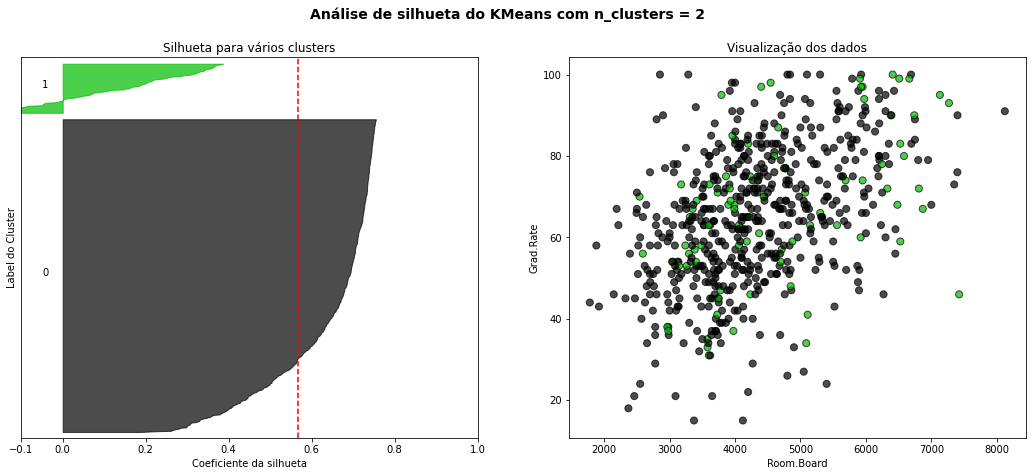

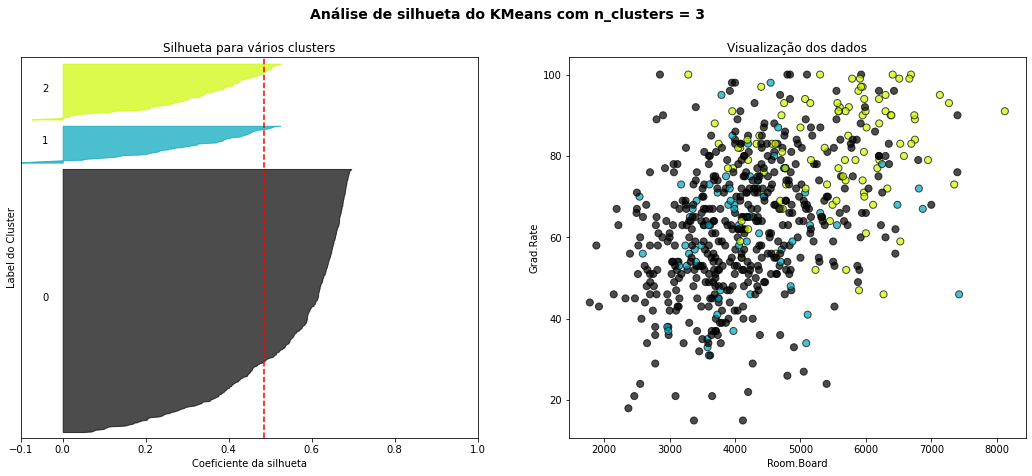

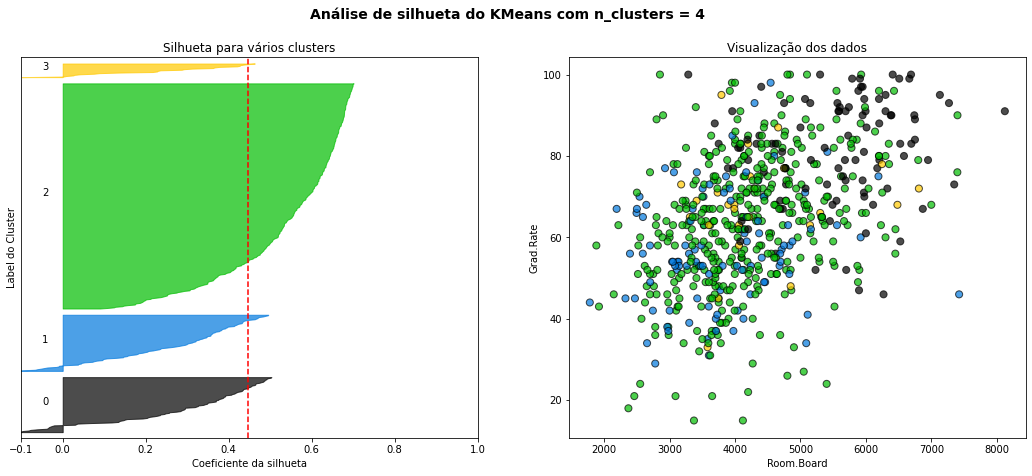

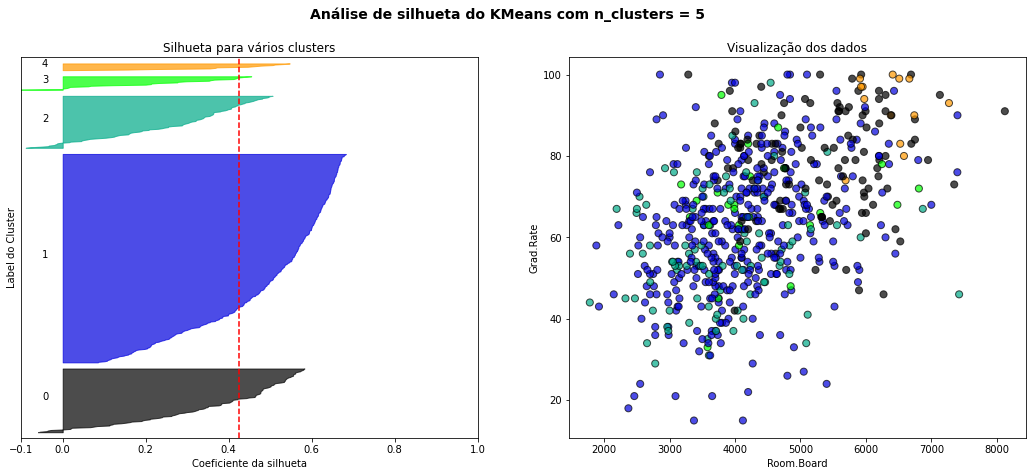

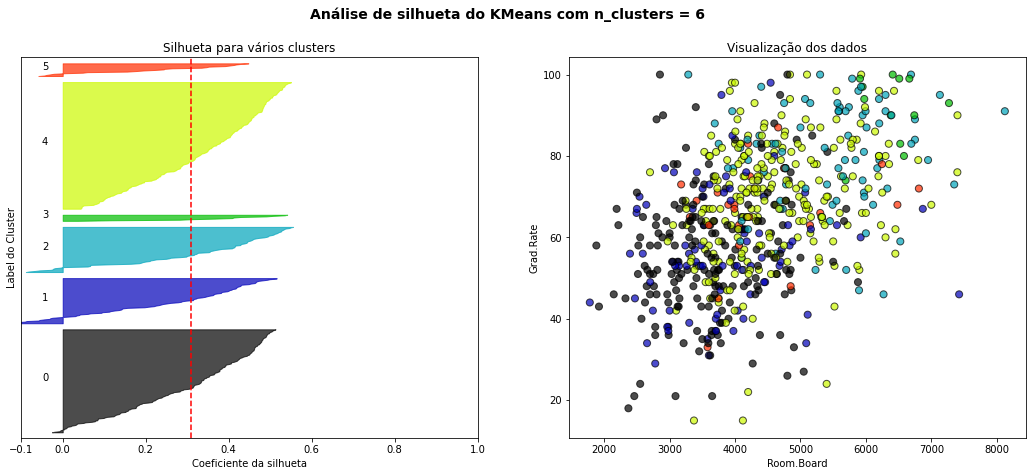

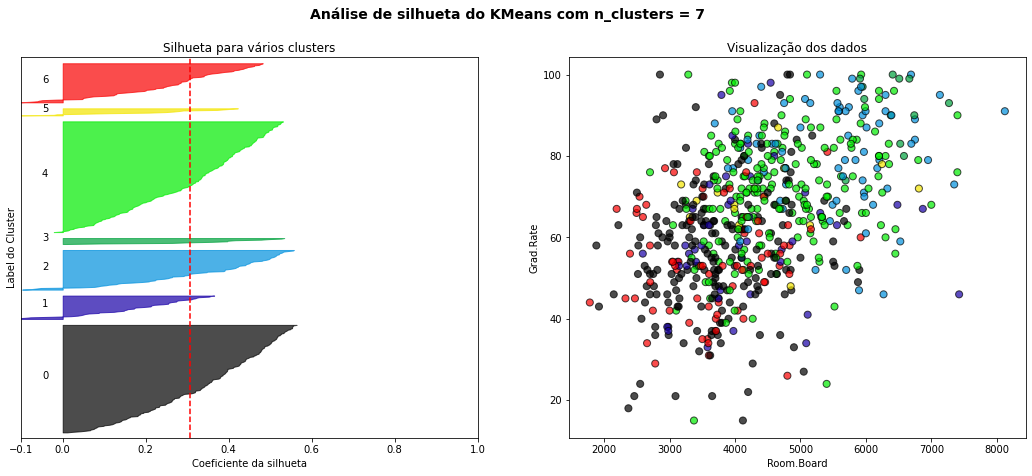

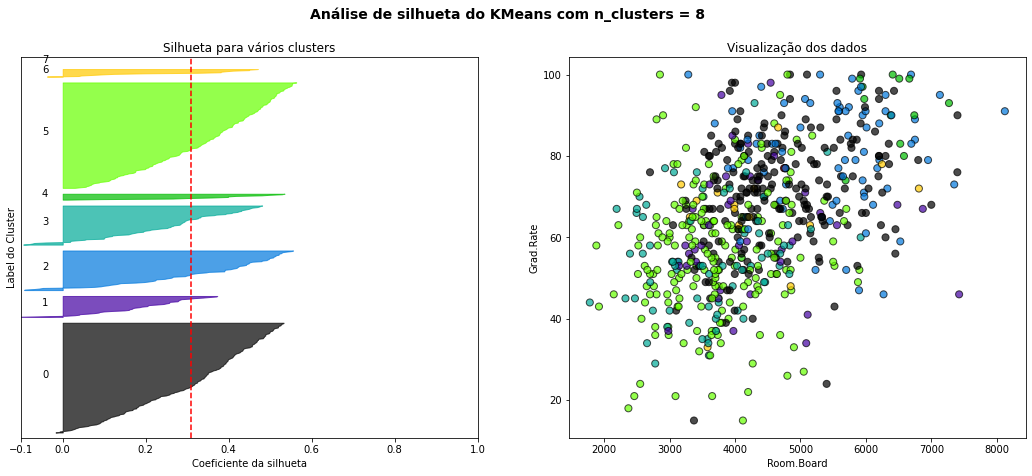

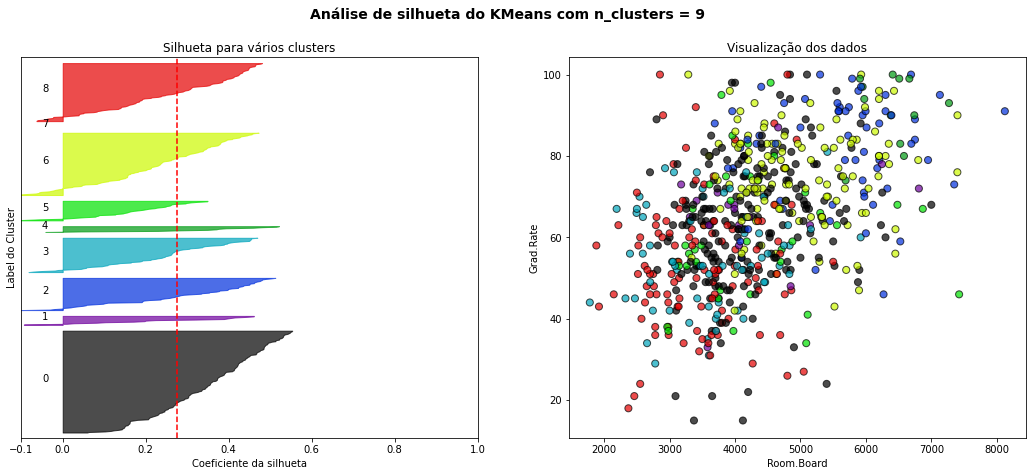

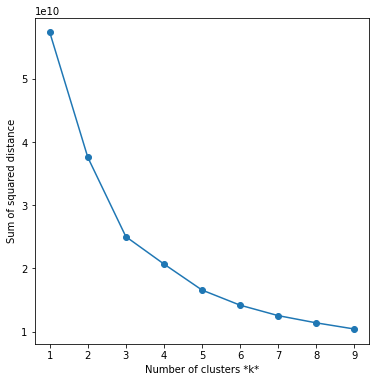

In [ ]:
n_clusters = range(1,10, 1)
inertia =[]
avg = pd.DataFrame()
for n_cluster in n_clusters:
  kmeans = KMeans(n_clusters = n_cluster, random_state = 10)
  kmeans.fit(x_train)
  inertia.append(kmeans.inertia_)
  if n_cluster != 1:
    plot_fit(kmeans, x_train, n_cluster)
    y_predict = kmeans.predict(x_train)
    
    silhouetteAvg = silhouette_score(x_train, y_predict)
    avg = avg.append({'Avg silhouette_score': silhouetteAvg, 'N cluster': n_cluster}, ignore_index = True)

plt.figure(figsize=(6, 6))
plt.plot(n_clusters, inertia, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');
plt.show()


In [ ]:
avg

,Avg silhouette_score,N cluster
0,0.566860,2.0
1,0.484430,3.0
2,0.445376,4.0
3,0.425350,5.0
4,0.310076,6.0
5,0.307772,7.0
6,0.308894,8.0
7,0.276070,9.0


O gráfico de silhueta mostra uma medida de proximidade de cada ponto em um cluster aos pontos nos clusters vizinhos. Os valores variam de -1 a 1 onde o valor 1 indica que a amostra está distante de outros clusters, o valor 0 indica que a amostra está no/muito próximo ao limite de decisão entre dois clusters vizinhos e valores negativos indicam que tais amostras podem ter sido inseridas no cluster errado.

Com base no score de silhueta e no gráfico de elbow, podemos ver que 2 é um bom número de clusters pois teve maior valor médio de silhueta.

In [ ]:
CLUSTERS = 2

Após a escolha do número de clusters, avalia-se a performance do modelo no dataset de teste.

              precision    recall  f1-score   support

           0       0.23      0.66      0.34        47
           1       0.30      0.06      0.11       109

    accuracy                           0.24       156
   macro avg       0.27      0.36      0.23       156
weighted avg       0.28      0.24      0.18       156



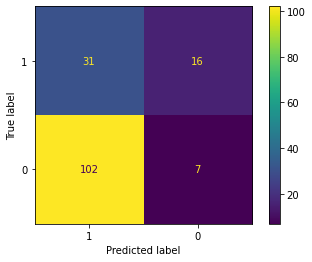

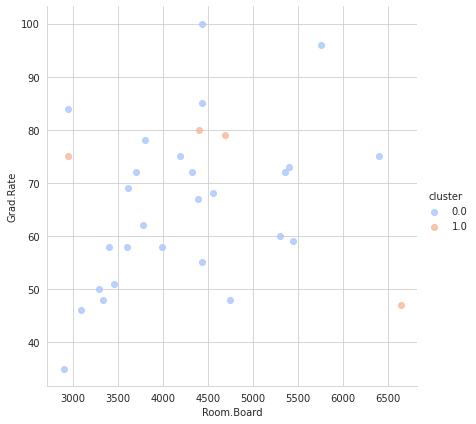

In [ ]:
kmeans = KMeans(n_clusters = CLUSTERS, random_state = 10)
kmeans.fit(x_train)
y_predict = kmeans_pred(kmeans, x_test, y_test, train=False)
plot_pred(y_predict, x_test)

É possível notar que o modelo apresentou uma performance ruim obtendo um F1 score de 0.23.

### Melhorando Classificação

Visando a melhoria do modelo observa-se a correlação entre as características e a coluna de saída utilizando a função corr do Pandas.

In [ ]:
correlation = collegeDf.corr()['Private'].drop('Private')
correlation

Apps          -0.432095
Accept        -0.475252
Enroll        -0.567908
Top10perc      0.164132
Top25perc      0.095752
F.Undergrad   -0.615561
P.Undergrad   -0.452088
Outstate       0.552650
Room.Board     0.340532
Books         -0.018549
Personal      -0.304485
PhD           -0.156714
Terminal      -0.129620
S.F.Ratio     -0.472205
perc.alumni    0.414775
Expend         0.258461
Grad.Rate      0.336490
Name: Private, dtype: float64

Esse valor varia entre -1 e 1, em que quanto mais próximo de 1 maior a probabilidade de uma coluna subir e a outra também, quanto mais próximo de -1 caso uma coluna suba a outra descerá. Para esta análise é tomado o valor de 0.3 como indicativo de boa correlação entre as colunas.

In [ ]:
columns = [correlation.index[x] for x in range(len(correlation)) if correlation[x] >= 0.3]

In [ ]:
columns

['Outstate', 'Room.Board', 'perc.alumni', 'Grad.Rate']

Sobraram apenas 4 colunas que indicam respectivamente número de alunos interestaduais, custo de alimentação e hospedagem, percentual de antigos alunos que doam à universidade e percentual de graduação.

In [ ]:
x2 = collegeDf[columns]
y2 = collegeDf['Private']

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2, test_size = 0.2, random_state = 15)


In [ ]:
x_train2.head()

,Outstate,Room.Board,perc.alumni,Grad.Rate
285,7656,4690,15,36
374,5580,2830,18,61
297,8842,4782,14,52
626,6994,3384,17,57
288,6995,3120,22,54


              precision    recall  f1-score   support

           0       0.49      0.98      0.65        47
           1       0.98      0.56      0.71       109

    accuracy                           0.69       156
   macro avg       0.74      0.77      0.68       156
weighted avg       0.83      0.69      0.70       156



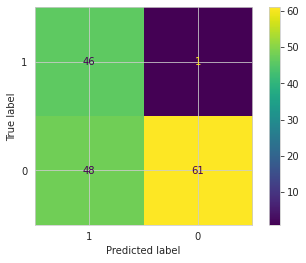

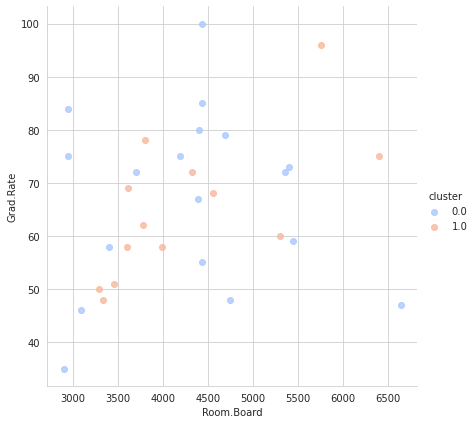

In [ ]:
kmeans = KMeans(n_clusters = CLUSTERS, random_state = 10)
kmeans.fit(x_train2)
y_predict = kmeans_pred(kmeans, x_test2, y_test2, train=False)
plot_pred(y_predict, x_test2)

Com uma melhor escolha das colunas percebe-se um aumento significante na performance do modelo que apresentou um F1 score de 0.68, cerca de 300% o antigo valor.

Percebe-se então que a escolha de colunas é fundamental para uma boa implementação do modelo KMeans.